In [8]:
import sys
import matplotlib.pyplot as plt
sys.path.insert(1,'/mnt/data/home/pjl54/WSI_handling')
import wsi

In [4]:
import torch
from unet import UNet

te_model = '/mnt/data/home/pjl54/bladder/bladderTE_1mpp_256p.pth'
te_mpp = 1;
device = 2

checkpoint = torch.load(te_model, map_location=lambda storage, loc: storage) #load checkpoint to CPU and then put to device https://discuss.pytorch.org/t/saving-and-loading-torch-models-on-2-machines-with-different-number-of-gpu-devices/6666
model = UNet(n_classes=checkpoint["n_classes"], in_channels=checkpoint["in_channels"],
             padding=checkpoint["padding"], depth=checkpoint["depth"], wf=checkpoint["wf"],
             up_mode=checkpoint["up_mode"], batch_norm=checkpoint["batch_norm"]).to(device)
model.load_state_dict(checkpoint["model_dict"])
model.eval()

UNet(
  (down_path): ModuleList(
    (0): UNetConvBlock(
      (block): Sequential(
        (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): ReLU()
        (5): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): UNetConvBlock(
      (block): Sequential(
        (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): ReLU()
        (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): UNetConvBlock(
      (block): Sequential(
        (0): Conv2d(16, 3

In [6]:
wsi_img = wsi.wsi(img_fname='/mnt/ccipd_data/UH_Bladder_Cancer_Project/Blad170830/Blad_1.tif',xml_fname='/mnt/ccipd_data/UH_Bladder_Cancer_Project/Blad170830/Blad_1.xml')

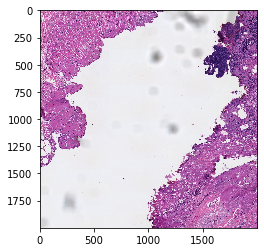

In [60]:
patch = wsi_img.get_tile(coords=(58000,26000),wh=(2000,2000),desired_mpp=1)
plt.imshow(patch)

In [61]:
import numpy as np
np.shape(np.expand_dims(patch,axis=0))

(1, 2000, 2000, 3)

In [62]:
arr_out_gpu = torch.from_numpy(np.expand_dims(patch,axis=0).transpose(0,3,1,2) / 255).type('torch.FloatTensor').to(device)
output_batch = model(arr_out_gpu)

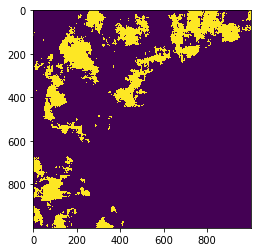

In [59]:
output = output_batch[0,:,:,:].detach().cpu().numpy()
plt.imshow(output.argmax(axis=0))


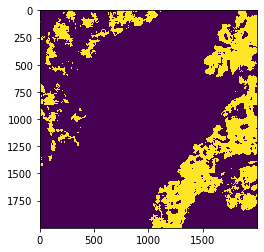

In [65]:
output = output_batch[0,:,:,:].detach().cpu().numpy()
plt.imshow(output.argmax(axis=0))
